<a href="https://colab.research.google.com/github/ManisMalakar/Convolutional-Neural-Network-/blob/main/Breast_Cancer_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [57]:
import tensorflow as tf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
#Data Pre Processing

from sklearn import datasets, metrics

In [59]:
#Importing the dataset
cancer=datasets.load_breast_cancer()

In [60]:
print(cancer.DESCR)

.. _breast_cancer_dataset:

Breast cancer wisconsin (diagnostic) dataset
--------------------------------------------

**Data Set Characteristics:**

    :Number of Instances: 569

    :Number of Attributes: 30 numeric, predictive attributes and the class

    :Attribute Information:
        - radius (mean of distances from center to points on the perimeter)
        - texture (standard deviation of gray-scale values)
        - perimeter
        - area
        - smoothness (local variation in radius lengths)
        - compactness (perimeter^2 / area - 1.0)
        - concavity (severity of concave portions of the contour)
        - concave points (number of concave portions of the contour)
        - symmetry 
        - fractal dimension ("coastline approximation" - 1)

        The mean, standard error, and "worst" or largest (mean of the three
        largest values) of these features were computed for each image,
        resulting in 30 features.  For instance, field 3 is Mean Radius, f

In [61]:
#Matrix of features
x=pd.DataFrame(data=cancer.data,columns=cancer.feature_names)
x.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,radius error,texture error,perimeter error,area error,smoothness error,compactness error,concavity error,concave points error,symmetry error,fractal dimension error,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [62]:
#Dependent variable
y=cancer.target
print(y)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 1 0 0 1 0 0 1 1 1 1 0 1 0 0 1 1 1 1 0 1 0 0
 1 0 1 0 0 1 1 1 0 0 1 0 0 0 1 1 1 0 1 1 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 1
 1 1 1 1 1 1 0 0 0 1 0 0 1 1 1 0 0 1 0 1 0 0 1 0 0 1 1 0 1 1 0 1 1 1 1 0 1
 1 1 1 1 1 1 1 1 0 1 1 1 1 0 0 1 0 1 1 0 0 1 1 0 0 1 1 1 1 0 1 1 0 0 0 1 0
 1 0 1 1 1 0 1 1 0 0 1 0 0 0 0 1 0 0 0 1 0 1 0 1 1 0 1 0 0 0 0 1 1 0 0 1 1
 1 0 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 1 0 1 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 1 1 1 1 1 1 0 1 0 1 1 0 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 1 1 1
 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 0 1 0 1 1 1 1 0 0 0 1 1
 1 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1 1 1 0 0 1 0 0
 0 1 0 0 1 1 1 1 1 0 1 1 1 1 1 0 1 1 1 0 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1
 1 0 1 1 1 1 1 0 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 0 1 0 1 1 1 1 1 0 1 1
 0 1 0 1 1 0 1 0 1 1 1 1 1 1 1 1 0 0 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 0 1
 1 1 1 1 1 1 0 1 0 1 1 0 

In [63]:
cancer.target_names

array(['malignant', 'benign'], dtype='<U9')

In [64]:
x.shape,y.shape

((569, 30), (569,))

In [65]:
#Splitting the dataset into train and test state

from sklearn.model_selection import train_test_split

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [66]:
x_train.shape,x_test.shape

((455, 30), (114, 30))

In [67]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler

sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)


In [68]:
x_train.shape

(455, 30)

In [69]:
x_train=x_train.reshape(455,30,1)
x_test=x_test.reshape(114,30,1)

In [70]:
x_train.shape,x_test.shape

((455, 30, 1), (114, 30, 1))

In [71]:
#Building the model

#Defining the object
model=tf.keras.models.Sequential()

#Adding the first CNN layer
model.add(tf.keras.layers.Conv1D(filters=32,kernel_size=2,activation='relu',input_shape=(30,1)))

#Adding the batch normalization
model.add(tf.keras.layers.BatchNormalization())

#Adding the droupout layer
model.add(tf.keras.layers.Dropout(0.2))

#Adding the second CNN layer
model.add(tf.keras.layers.Conv1D(filters=64,kernel_size=2,activation='relu'))

#Adding the second batch normalization
model.add(tf.keras.layers.BatchNormalization())

#Adding the second droupout layer
model.add(tf.keras.layers.Dropout(0.4))



In [72]:
#Adding a flatten layer
model.add(tf.keras.layers.Flatten())

#Adding a dense layer
model.add(tf.keras.layers.Dense(units=128,activation='relu'))

#Adding a dense layer
model.add(tf.keras.layers.Dense(units=1,activation='sigmoid'))

In [73]:
model.summary()

Model: "sequential_6"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_5 (Conv1D)            (None, 29, 32)            96        
_________________________________________________________________
batch_normalization_4 (Batch (None, 29, 32)            128       
_________________________________________________________________
dropout_4 (Dropout)          (None, 29, 32)            0         
_________________________________________________________________
conv1d_6 (Conv1D)            (None, 28, 64)            4160      
_________________________________________________________________
batch_normalization_5 (Batch (None, 28, 64)            256       
_________________________________________________________________
dropout_5 (Dropout)          (None, 28, 64)            0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 1792)             

In [74]:
#Compiling the model
opt=tf.keras.optimizers.Adam(learning_rate=0.00005)
model.compile(optimizer=opt,loss='binary_crossentropy',metrics=['accuracy'])

In [75]:
#Traning the model
history=model.fit(x_train,y_train,epochs=50, validation_data=(x_test,y_test))

Epoch 1/50
15/15 [==============================] - 1s 35ms/step - loss: 0.7354 - accuracy: 0.6641 - val_loss: 0.6038 - val_accuracy: 0.9123
Epoch 2/50
15/15 [==============================] - 0s 11ms/step - loss: 0.3996 - accuracy: 0.8502 - val_loss: 0.5445 - val_accuracy: 0.9298
Epoch 3/50
15/15 [==============================] - 0s 11ms/step - loss: 0.2431 - accuracy: 0.8970 - val_loss: 0.5034 - val_accuracy: 0.8860
Epoch 4/50
15/15 [==============================] - 0s 12ms/step - loss: 0.1890 - accuracy: 0.9256 - val_loss: 0.4728 - val_accuracy: 0.8509
Epoch 5/50
15/15 [==============================] - 0s 11ms/step - loss: 0.1828 - accuracy: 0.9117 - val_loss: 0.4485 - val_accuracy: 0.8158
Epoch 6/50
15/15 [==============================] - 0s 11ms/step - loss: 0.1434 - accuracy: 0.9561 - val_loss: 0.4265 - val_accuracy: 0.7719
Epoch 7/50
15/15 [==============================] - 0s 11ms/step - loss: 0.1160 - accuracy: 0.9641 - val_loss: 0.4107 - val_accuracy: 0.7632
Epoch 8/50
15

In [76]:
#Predicting the model

y_pred=model.predict_classes(x_test)
print(y_pred[31]),print(y_test[31])

[0]
0


/usr/local/lib/python3.6/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning: `model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).
  warnings.warn('`model.predict_classes()` is deprecated and '


(None, None)

In [77]:
#Confusion matrix
from sklearn.metrics import confusion_matrix, accuracy_score

cm=confusion_matrix(y_test,y_pred)
print(cm)

[[45  2]
 [ 1 66]]


In [78]:
acc_cm=accuracy_score(y_test,y_pred)
print(acc_cm)

0.9736842105263158


In [79]:
#Learning Curve

def learning_curve(history, epoch):

  # training vs validation accuracy
  epoch_range = range(1, epoch+1)
  plt.plot(epoch_range, history.history['accuracy'])
  plt.plot(epoch_range, history.history['val_accuracy'])
  plt.title('Model Accuracy')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

  # training vs validation loss
  plt.plot(epoch_range, history.history['loss'])
  plt.plot(epoch_range, history.history['val_loss'])
  plt.title('Model Loss')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'val'], loc='upper left')
  plt.show()

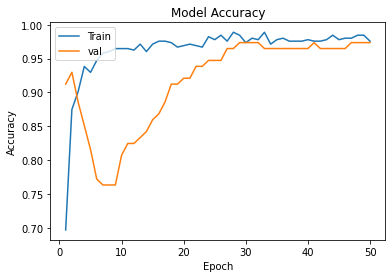

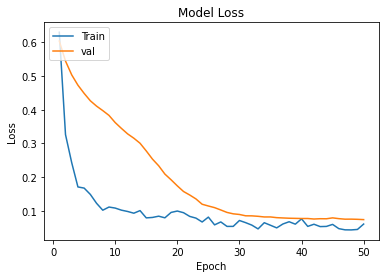

In [80]:
learning_curve(history, 50)